In [122]:
#imports
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading in the air quality dataset
df = pd.read_csv("AQI_Respiratory_2000_2019.csv")

#drop unneeded columns
df = df.drop(columns=["FIPS,YEAR", "fips"], errors="ignore")

#cleaning dataset
df= df.dropna()

#scaling features
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#checking the cleaned up dataset
print(df.head())
print(df.columns)


               location_name      year  Resp Death Rate  Days with AQI  \
0   Madison County (Alabama) -1.619519        -0.214257       0.752921   
1   Colbert County (Alabama) -1.619519         1.282844      -1.829484   
2    DeKalb County (Alabama) -1.619519         0.871872       0.633733   
3  Lawrence County (Alabama) -1.619519         0.832302      -0.180718   
4    Morgan County (Alabama) -1.619519         0.902648      -0.677334   

   Good Days  Moderate Days  Unhealthy for Sensitive Groups Days  \
0  -0.117021       0.833387                             1.912356   
1  -1.918017      -0.085113                            -0.428171   
2  -0.318375       0.550771                             4.252883   
3  -0.754641       0.395333                             1.828765   
4  -1.347515       0.183371                             2.831849   

   Unhealthy Days  Very Unhealthy Days  Hazardous Days   Max AQI  \
0        0.907525            -0.134978       -0.054315  0.148693   
1       -0

/var/folders/8q/_6vs3zr521lf6lb07_4mdnr00000gn/T/ipykernel_96632/1973838162.py:10: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AQI_Respiratory_2000_2019.csv")


<Axes: >

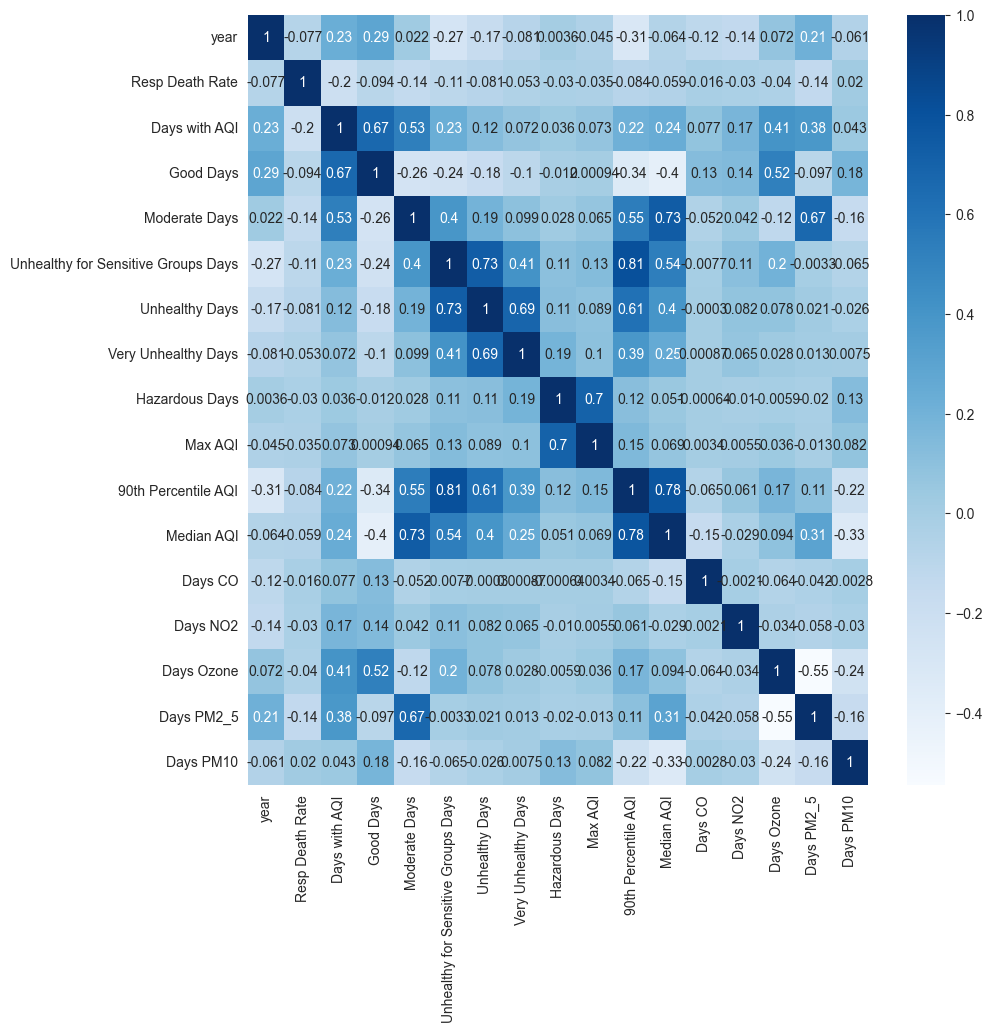

In [52]:
# Data Exploration - Heatmap
correlations = df.drop(columns='location_name').corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlations, annot=True, cmap='Blues')

In [123]:
# Setting up the elbow method plot
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df.drop(columns=['location_name', 'year']))
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0.5, 0, 'Number of Clusters')

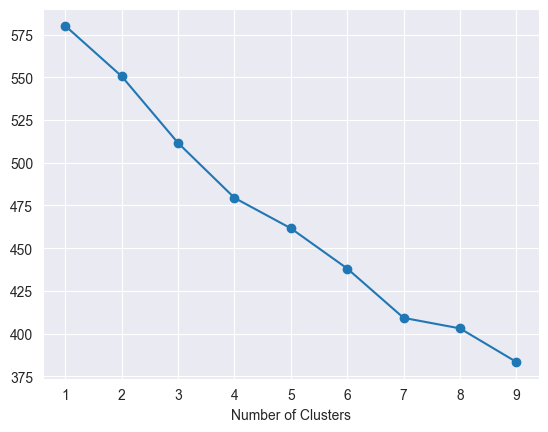

In [124]:
#Plotting elbow method to find best number of clusters
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')

In [125]:
#Creating K-means clustering models to group respiratory death rate based on AQI days and pollutant type
# Went with 3 clusters after experimenting with various other k values
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 0, n_init=1)
kmeans.fit(df.drop(columns=['location_name', 'year']))
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

In [126]:
#Adding the clustering labels to the dataset
y = kmeans.fit_predict(df.drop(columns=['location_name','year']))
df['Cluster'] = y

In [128]:
#Checking distribution of each cluster
df['Cluster'].value_counts()

Cluster
1    10674
2     6262
0     4092
Name: count, dtype: int64

In [ ]:
#Next set of code blocks is plotting the clusters with respiratory death rate being on the y-axis and the AQI days and pollutant types on the x-axis

In [198]:
custom_colors = ["#0040df", '#0080bf','#00c09f']

Text(0, 0.5, 'Respiratory Death Rate')

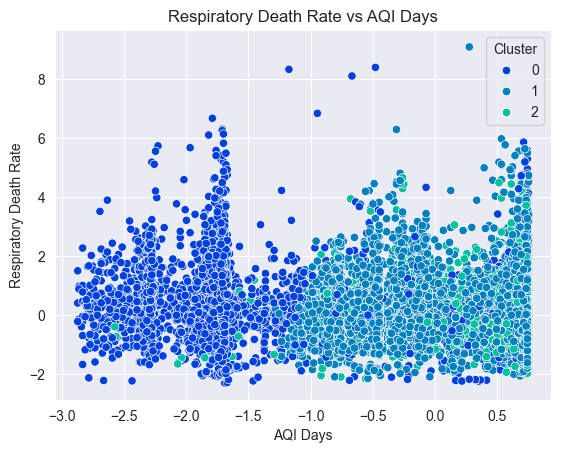

In [199]:
sns.scatterplot(x = df['Days with AQI'], y = df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs AQI Days")
plt.xlabel('AQI Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

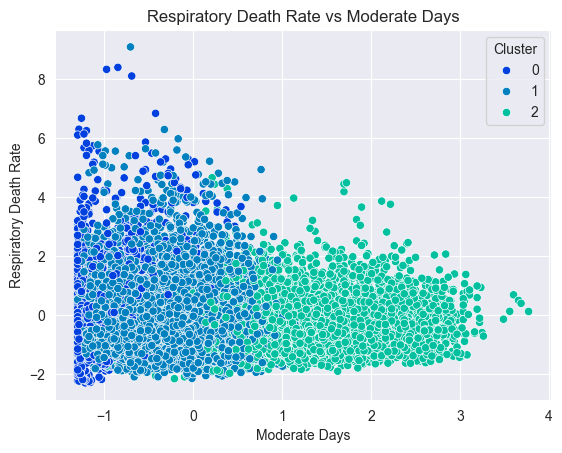

In [200]:
sns.scatterplot(x = df['Moderate Days'], y = df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs Moderate Days")
plt.xlabel('Moderate Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

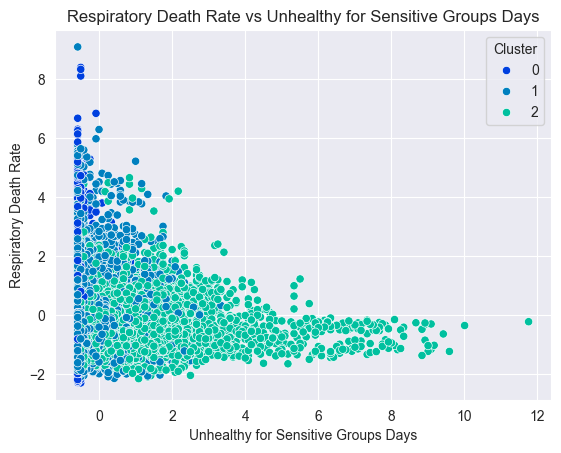

In [201]:
sns.scatterplot(x = df['Unhealthy for Sensitive Groups Days'], y = df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs Unhealthy for Sensitive Groups Days")
plt.xlabel('Unhealthy for Sensitive Groups Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

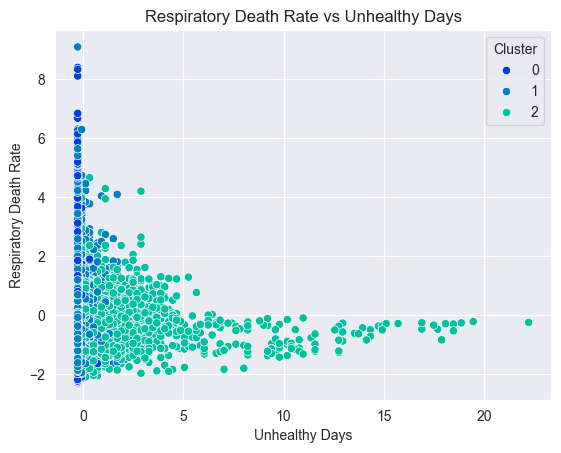

In [202]:
sns.scatterplot(x = df['Unhealthy Days'], y = df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs Unhealthy Days")
plt.xlabel('Unhealthy Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

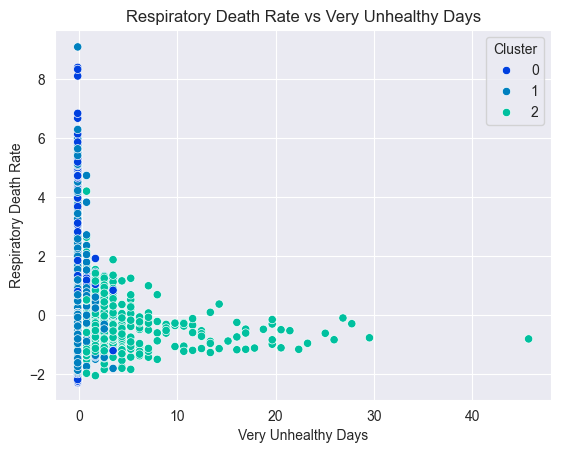

In [203]:
sns.scatterplot(x = df['Very Unhealthy Days'], y = df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs Very Unhealthy Days")
plt.xlabel('Very Unhealthy Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

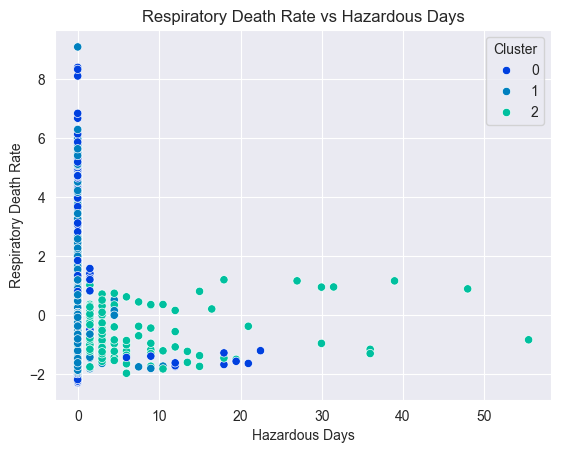

In [204]:
sns.scatterplot(x = df['Hazardous Days'], y = df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs Hazardous Days")
plt.xlabel('Hazardous Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

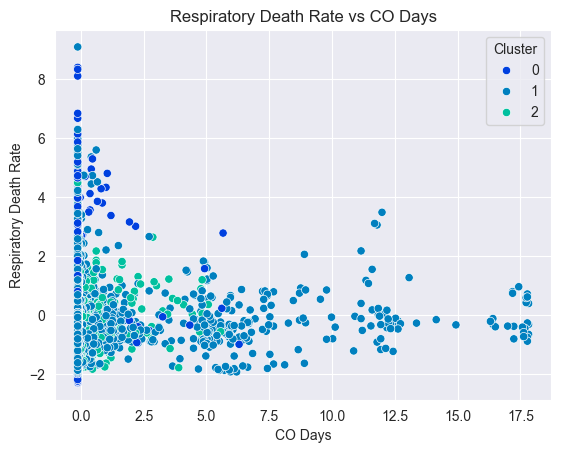

In [205]:
sns.scatterplot(x=df['Days CO'], y=df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs CO Days")
plt.xlabel('CO Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

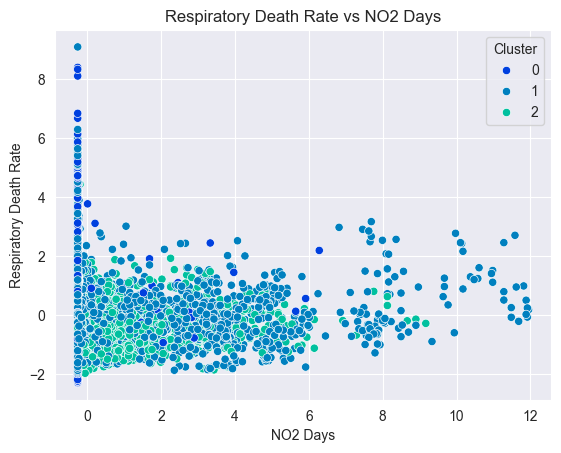

In [206]:
sns.scatterplot(x=df['Days NO2'], y=df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs NO2 Days")
plt.xlabel('NO2 Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

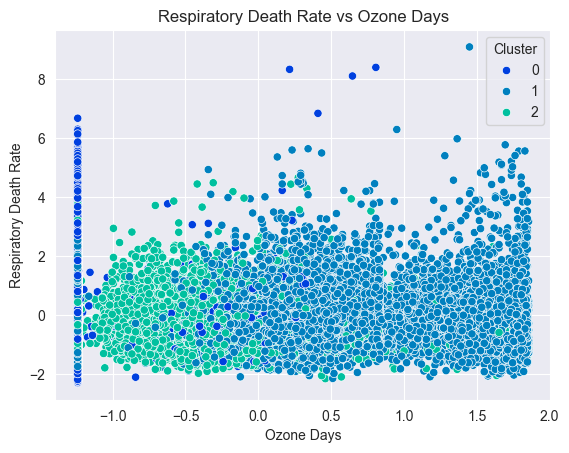

In [207]:
sns.scatterplot(x=df['Days Ozone'], y=df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs Ozone Days")
plt.xlabel('Ozone Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

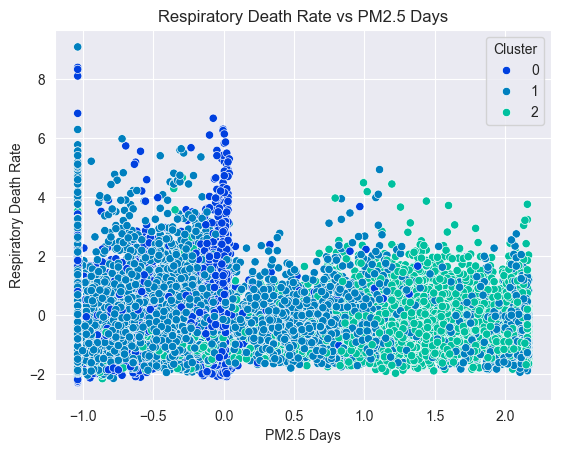

In [208]:
sns.scatterplot(x=df['Days PM2_5'], y=df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
plt.title("Respiratory Death Rate vs PM2.5 Days")
plt.xlabel('PM2.5 Days')
plt.ylabel('Respiratory Death Rate')

Text(0, 0.5, 'Respiratory Death Rate')

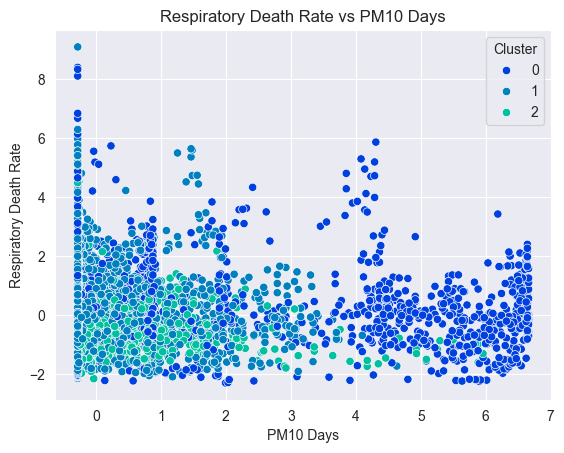

In [209]:
sns.scatterplot(x=df['Days PM10'], y=df['Resp Death Rate'], hue=df['Cluster'], palette=custom_colors)
sns.color_palette("flare")
plt.title("Respiratory Death Rate vs PM10 Days")
plt.xlabel('PM10 Days')
plt.ylabel('Respiratory Death Rate')

Key Insights:
* Cluster 1 (Below average number of AQI Days) *See Resp Death Rate vs Days with AQI scatter plot*
  - This cluster contains yearly respiratory death rates that had a below average number of AQI days which suggest that air pollution likely had no significant role in respiratory related deaths. It does not mean that air pollution can be excluded for cases of respiratory related deaths but rather the chances of respiratory related death being linked to air pollution is low


* Cluster 0 (Average number of AQI Days) *See Resp Death Rate vs Days with AQI scatter plot*

   -  This cluster contains yearly respiratory death rates that had close to an average amount of AQI days.
   -  Most of the days were classified as good or moderate which suggest that air pollution had a minor role in respiratory related deaths. However, comparing it to cluster 1 does show the chances of respiratory related death being linked to air pollution is higher.
   - All 5 air pollutant types contributed to the AQI days. Number of CO, NO2, Ozone, and PM10 days were mostly higher than average while the number of PM2.5 days were mostly at or below average

* Cluster 2 (Average number of AQI Days) *See Resp Death Rate vs Days with AQI scatter plot*
  - This cluster also contains yearly respiratory death rates that had close to an average amount of AQI days.
  - What makes this cluster different from cluster 1 is the amount of days higher than moderate. Cluster 2 has significantly more moderate to hazardous days as seen in the scatter plots. This suggests that air pollution likely had a moderate to significant role in respiratory related deaths. In other words, the chances that respiratory related death are realted to air pollution is the highest in this cluster
  - Just like in cluster 1, all 5 air pollutant types contributed to the AQI days, but the there are differences in which types has higher than average days. Number of NO2, PM10, PM2.5 days were mostly above average; Number of CO days were slight above average; Number of Ozone days were mostly below average